# IMPORTING LIBRARIES 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from sklearn.cluster import KMeans 
from scipy.stats import zscore
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt 
%matplotlib inline 

# EXPLORATORY DATA ANALYSIS 

In [2]:
df = pd.read_csv("FYDPData.csv")
df.head(10)

,Timestamp,Temp,Hum (%),Voltage (V),Current (Amp),Vibration (Vib)
0,2/13/2023,24.0,39.7,28.02,1.75,9.38
1,2/13/2023,23.3,40.1,22.50,1.39,9.77
2,2/13/2023,24.3,38.7,22.47,1.23,10.27
3,2/13/2023,24.3,38.8,22.79,1.17,9.33
4,2/13/2023,24.2,38.5,23.92,1.24,9.84
5,2/13/2023,24.1,38.8,22.59,1.08,9.82
6,2/13/2023,24.0,38.8,23.33,1.30,9.92
7,2/13/2023,24.0,39.0,27.53,1.10,9.92
8,2/13/2023,24.1,39.1,22.84,1.21,9.97
9,2/13/2023,24.1,39.0,26.86,1.18,9.54


In [3]:
df1 = df.drop(labels="Timestamp",axis=1)
df1.head(10)

,Temp,Hum (%),Voltage (V),Current (Amp),Vibration (Vib)
0,24.0,39.7,28.02,1.75,9.38
1,23.3,40.1,22.50,1.39,9.77
2,24.3,38.7,22.47,1.23,10.27
3,24.3,38.8,22.79,1.17,9.33
4,24.2,38.5,23.92,1.24,9.84
5,24.1,38.8,22.59,1.08,9.82
6,24.0,38.8,23.33,1.30,9.92
7,24.0,39.0,27.53,1.10,9.92
8,24.1,39.1,22.84,1.21,9.97
9,24.1,39.0,26.86,1.18,9.54


In [4]:
print(df1.isnull().sum())
print(df1.shape)

Temp               0
Hum (%)            0
Voltage (V)        0
Current (Amp)      0
Vibration (Vib)    0
dtype: int64
(999, 5)


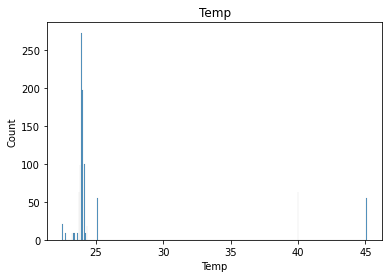

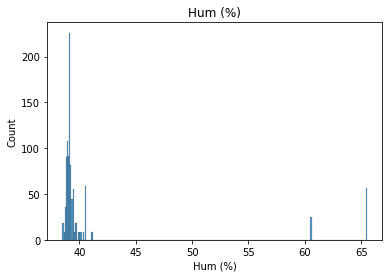

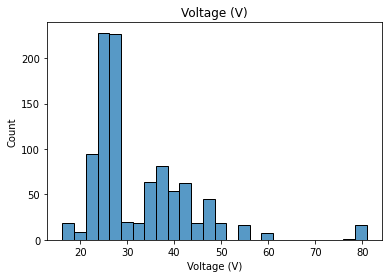

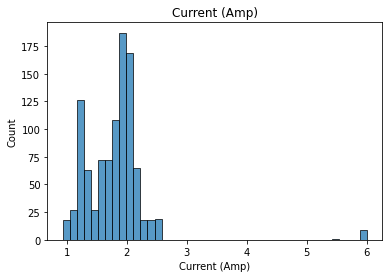

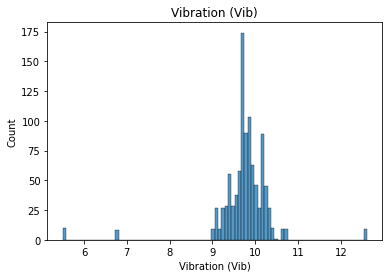

In [5]:
for col in df1.columns:
    plt.figure()
    sns.histplot(df[col], kde=False)
    plt.title(col)
    plt.show()

### PRINCIPAL COMPONENT ANALYSIS 

In [6]:
X=df1

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print(X_pca[:5])
print(X.shape)

[[-3.93771905 -1.65534362]
 [-9.2755367  -1.78043612]
 [-9.25285816 -3.34098951]
 [-8.95924446 -3.21321357]
 [-7.79335308 -3.34826051]]
(999, 5)


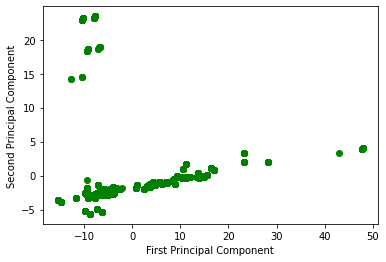

In [7]:
plt.scatter(X_pca[:, 0], X_pca[:, 1],c='green')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

### ELBOW METHOD 

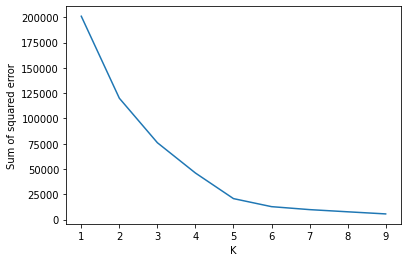

In [8]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)
    
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

# MACHINE LEARNING MODEL 

#### After performing the elbow method we have found that for substantial working of Algorithm, num_clusters=5

In [9]:
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(X)
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1,
       1, 4, 1, 4, 4, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1,
       1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4,
       4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4,

In [10]:
df1['cluster']=y_predicted
df1.head(20)

,Temp,Hum (%),Voltage (V),Current (Amp),Vibration (Vib),cluster
0,24.0,39.7,28.02,1.75,9.38,1
1,23.3,40.1,22.50,1.39,9.77,1
2,24.3,38.7,22.47,1.23,10.27,1
3,24.3,38.8,22.79,1.17,9.33,1
4,24.2,38.5,23.92,1.24,9.84,1
5,24.1,38.8,22.59,1.08,9.82,1
6,24.0,38.8,23.33,1.30,9.92,1
7,24.0,39.0,27.53,1.10,9.92,1
8,24.1,39.1,22.84,1.21,9.97,1
9,24.1,39.0,26.86,1.18,9.54,1


In [11]:
km.cluster_centers_

array([[25.59756098, 63.97560976, 26.66719512,  2.04365854,  9.88817073],
       [24.01471322, 39.09276808, 24.96673317,  1.58660848,  9.61336658],
       [23.52926829, 39.70243902, 67.09073171,  1.78829268,  9.88512195],
       [42.25663717, 39.71946903, 26.85575221,  2.01858407,  9.77070796],
       [23.81740331, 39.18425414, 40.38861878,  1.92740331,  9.86814917]])

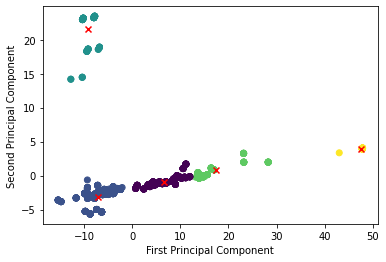

In [12]:
km.fit(X_pca)
y_preidct2= km.predict(X_pca)

labels = km.labels_
centers = km.cluster_centers_

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [13]:
print(y_preidct2)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 3 3 3 0 0 1 0 1 0 0 0 0
 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 3 3 3 3 3 3 0 0 0 0 0 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [14]:
pred=[[45, 25 ,35, 5, 12]]
pred_pca = pca.transform(pred)

pre_cl=km.predict(pred_pca)
pre_cl

c:\Users\Bleach\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


array([1])

In [15]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score

inertia = km.inertia_
ch_score = calinski_harabasz_score(X_pca,y_preidct2)
db_score = davies_bouldin_score(X_pca,y_preidct2)
silhouette_avg = silhouette_score(X_pca,y_preidct2)

print("The average silhouette score is :", silhouette_avg*100)
print("Inertia:", inertia)
print("Calinski-Harabasz score:", ch_score)
print("Davies-Bouldin score:", db_score*100)

The average silhouette score is : 69.70667897664455
Inertia: 9953.487558077304
Calinski-Harabasz score: 3913.8841415600623
Davies-Bouldin score: 38.025913002174256


# FLASK API FOR REAL TIME 

In [16]:
import joblib
joblib.dump(km, 'km.pkl')
print('Model dumped')
km = joblib.load('km.pkl')
km_columns = list(X_pca)
joblib.dump(km_columns, 'km_columns.pkl')

Model dumped


['km_columns.pkl']

In [17]:
lr = joblib.load('km.pkl')
print ('Model loaded')
model_columns = joblib.load('km_columns.pkl')
print ('Model columns loaded')

Model loaded
Model columns loaded


In [18]:
from flask import Flask, request, jsonify
import traceback

app = Flask(__name__)
@app.route('/predict', methods=['POST'])
def predict():
    if lr:
        try:
            json_ = request.json
            query = pd.DataFrame(json_)
            print(query)

            prediction = list(lr.predict(query))

            return jsonify({'prediction': str(prediction)})

        except:

            return jsonify({'trace': traceback.format_exc()})
    else:
        print ('Train the model first')
        return ('No model here to use')